In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [393]:
temp = pd.read_excel("temperature_data.xlsx")
vib = pd.read_excel("vibration v2.xlsx")
fault = pd.read_excel("bant durması v4.xlsx")

In [394]:
temp.describe()

,temperature
count,4616.000000
mean,100.532990
std,10.218353
min,58.733724
25%,93.570349
50%,101.085327
75%,107.788205
max,131.101108


In [395]:
temp.head()

,datetime,temperature
0,2021-11-20 09:00:00,113.077935
1,2021-11-20 10:00:00,95.460525
2,2021-11-20 11:00:00,75.237905
3,2021-11-20 12:00:00,109.248561
4,2021-11-20 13:00:00,111.886648


In [396]:
temp.set_index("datetime",inplace = True)

In [397]:
temp.head()

,temperature
datetime,
2021-11-20 09:00:00,113.077935
2021-11-20 10:00:00,95.460525
2021-11-20 11:00:00,75.237905
2021-11-20 12:00:00,109.248561
2021-11-20 13:00:00,111.886648


In [398]:
vib.describe()

,vibration
count,49035.000000
mean,42.978110
std,6.827197
min,0.000000
25%,38.739313
50%,43.041950
75%,47.345481
max,70.771513


In [399]:
vib.head()

,datetime,vibration
0,2022-03-11 15:09:00,39.906735
1,2022-03-11 15:10:00,42.681800
2,2022-03-11 15:11:00,38.550681
3,2022-03-11 15:12:00,44.116554
4,2022-03-11 15:13:00,41.376190


In [400]:
vib.set_index("datetime",inplace=True)

In [401]:
vib.head()

,vibration
datetime,
2022-03-11 15:09:00,39.906735
2022-03-11 15:10:00,42.681800
2022-03-11 15:11:00,38.550681
2022-03-11 15:12:00,44.116554
2022-03-11 15:13:00,41.376190


<AxesSubplot:xlabel='datetime'>

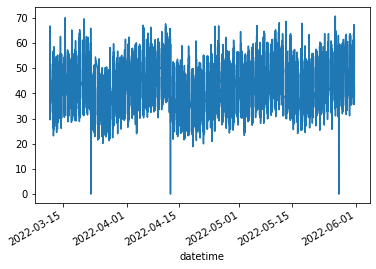

In [402]:
vib["vibration"].plot()

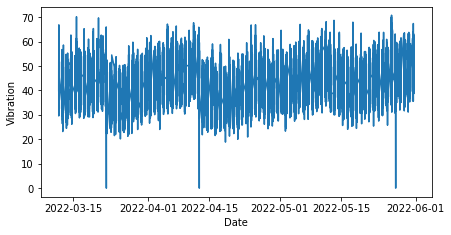

In [403]:
(fig, ax) = plt.subplots(figsize=(7,3.5))
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('Vibration')  # Add a y-label to the axes.
ax.plot(vib.index, vib["vibration"])

plt.savefig("vibdata.png",dpi=200)

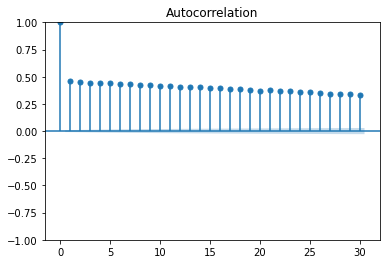

In [404]:
# Autocorrelation plot
plot_acf(vib['vibration'], lags = 30)
plt.show()

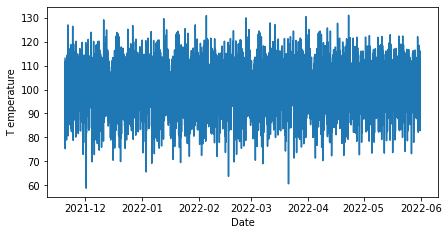

In [405]:
(fig, ax) = plt.subplots(figsize=(7,3.5))
ax.set_xlabel('Date') 
ax.set_ylabel('T emperature') 
ax.plot(temp.index, temp["temperature"])

plt.savefig("temp.png",dpi=200)

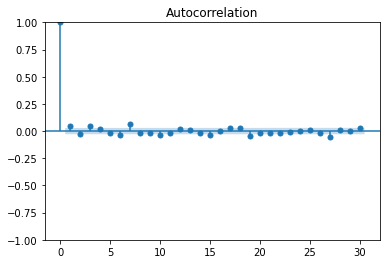

In [406]:
# Autocorrelation plot
plot_acf(temp['temperature'], lags = 30)
plt.show()

In [407]:
fault.head()

,date,ARIZA AÇIKLAMASI
0,2022-01-06,Bant Durması
1,2021-01-14,Bant Durması
2,2021-01-16,Bant Durması
3,2021-02-04,Bant Durması
4,2021-02-05,Bant Durması


In [408]:
fault.set_index("date",inplace = True)

In [409]:
fault.drop("ARIZA AÇIKLAMASI ",axis=1,inplace= True)

In [410]:
fault["fault"] = 1
fault.head()

,fault
date,
2022-01-06,1
2021-01-14,1
2021-01-16,1
2021-02-04,1
2021-02-05,1


In [411]:
#creating date dataframe
datelist = pd.date_range(start = "2022-03-11 15:09:00", end = "2022-05-30 14:12:00", freq = "1H")
datelist = pd.DataFrame(datelist)

In [412]:
datelist[0] = pd.to_datetime(datelist[0])

In [413]:
datelist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       1920 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.1 KB


In [414]:
datelist.set_index(0, inplace = True)

In [415]:
datelist.head()

""
0
2022-03-11 15:09:00
2022-03-11 16:09:00
2022-03-11 17:09:00
2022-03-11 18:09:00
2022-03-11 19:09:00


In [416]:
vib.reset_index(inplace=True)

In [417]:
vib["datetime"] = pd.to_datetime(vib["datetime"])
vib["minutes"] = vib['datetime'].dt.minute

In [418]:
vib2 = vib[vib["minutes"] == 9]

In [419]:
vib2.drop("minutes", axis=1, inplace = True)

C:\Users\Deniz\AppData\Local\Temp/ipykernel_7288/3520516103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vib2.drop("minutes", axis=1, inplace = True)


In [420]:
vib2

,datetime,vibration
0,2022-03-11 15:09:00,39.906735
60,2022-03-11 16:09:00,57.874162
120,2022-03-11 17:09:00,44.629175
186,2022-03-12 08:09:00,41.347278
246,2022-03-12 09:09:00,43.415958
...,...,...
48786,2022-05-31 10:09:00,58.392782
48846,2022-05-31 11:09:00,47.416705
48906,2022-05-31 12:09:00,41.031910
48966,2022-05-31 13:09:00,54.774501


In [511]:
t_datelist = pd.date_range(start = "2021-11-20 09:09:00", end = "2022-05-31 15:09:00", freq = "1H")
t_datelist = pd.DataFrame(t_datelist)

In [512]:
temp.reset_index(inplace = True)

In [513]:
t_datelist

,0
0,2021-11-20 09:09:00
1,2021-11-20 10:09:00
2,2021-11-20 11:09:00
3,2021-11-20 12:09:00
4,2021-11-20 13:09:00
...,...
4610,2022-05-31 11:09:00
4611,2022-05-31 12:09:00
4612,2022-05-31 13:09:00
4613,2022-05-31 14:09:00


In [514]:
temp.set_index("datetime")
vib.set_index("datetime")
t_datelist.columns = ["datetime"]

In [515]:
datelist= ["datetime"]

In [516]:
datelist1 = datelist[0]

In [517]:
t_datelist

,datetime
0,2021-11-20 09:09:00
1,2021-11-20 10:09:00
2,2021-11-20 11:09:00
3,2021-11-20 12:09:00
4,2021-11-20 13:09:00
...,...
4610,2022-05-31 11:09:00
4611,2022-05-31 12:09:00
4612,2022-05-31 13:09:00
4613,2022-05-31 14:09:00


In [518]:
vib2 = vib.reset_index()
vib2 = vib2.drop(["minutes","index"],axis=1)

In [520]:
df = t_datelist.merge(vib2, on="datetime")

In [521]:
df

,datetime,vibration
0,2022-03-11 15:09:00,39.906735
1,2022-03-11 16:09:00,57.874162
2,2022-03-11 17:09:00,44.629175
3,2022-03-12 08:09:00,41.347278
4,2022-03-12 09:09:00,43.415958
...,...,...
805,2022-05-31 10:09:00,58.392782
806,2022-05-31 11:09:00,47.416705
807,2022-05-31 12:09:00,41.031910
808,2022-05-31 13:09:00,54.774501


In [542]:
temp.drop("datetime",axis = 1, inplace = True)

In [543]:
temp["datetime"] = t_datelist

In [544]:
df2 = pd.merge(df,temp, on= "datetime")

In [545]:
df2

,datetime,vibration,temperature
0,2022-03-11 15:09:00,39.906735,86.328309
1,2022-03-11 16:09:00,57.874162,110.306267
2,2022-03-11 17:09:00,44.629175,115.066613
3,2022-03-12 08:09:00,41.347278,107.068719
4,2022-03-12 09:09:00,43.415958,105.129670
...,...,...,...
805,2022-05-31 10:09:00,58.392782,95.244768
806,2022-05-31 11:09:00,47.416705,89.035448
807,2022-05-31 12:09:00,41.031910,116.222703
808,2022-05-31 13:09:00,54.774501,82.812946


In [546]:
df2["fail"] = 0

In [547]:
df2[(df["datetime"] >= "2022-03-22 09:09:00") & (df["datetime"] <= "2022-03-22 11:05:00")]["fail"]

104    0
105    0
Name: fail, dtype: int64

In [548]:
df2[(df["datetime"] >= "2022-03-22 11:09:00") & (df["datetime"] <= "2022-03-22 12:05:00")]

,datetime,vibration,temperature,fail
106,2022-03-22 11:09:00,0.0,108.306458,0


In [549]:
df2.loc[(df["datetime"] >= "2022-03-22 07:09:00") & (df["datetime"] <= "2022-03-22 11:05:00"), "fail"] = 1

In [550]:
df2.loc[(df["datetime"] >= "2022-03-22 07:09:00") & (df["datetime"] <= "2022-03-22 11:05:00"), "fail"]

103    1
104    1
105    1
Name: fail, dtype: int64

In [551]:
df2.loc[(df["datetime"] >= "2022-04-12 12:09:00") & (df["datetime"] <= "2022-04-12 15:20:00"), "fail"] = 1

In [552]:
df2.loc[(df["datetime"] >= "2022-04-12 12:09:00") & (df["datetime"] <= "2022-04-12 15:20:00"), "fail"] 

317    1
318    1
319    1
320    1
Name: fail, dtype: int64

In [562]:
df2.loc[(df["datetime"] >= "2022-05-27 08:09:00") & (df["datetime"] <= "2022-05-27 10:20:00"), "fail"] = 1

In [563]:
df2.loc[(df["datetime"] >= "2022-05-27 09:09:00") & (df["datetime"] <= "2022-05-27 10:20:00"), "fail"]

764    1
765    1
Name: fail, dtype: int64

In [564]:
df2.corr()

,vibration,temperature,fail
vibration,1.000000,0.031913,0.084207
temperature,0.031913,1.000000,-0.019667
fail,0.084207,-0.019667,1.000000


<AxesSubplot:>

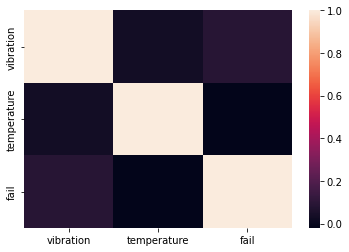

In [565]:
import seaborn as sns
corr = df2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [988]:
df2.corr()

,vibration,temperature,fail
vibration,1.000000,0.031913,0.084207
temperature,0.031913,1.000000,-0.019667
fail,0.084207,-0.019667,1.000000


In [598]:
dfvib = vib2

In [599]:
dfvib["fail"] = 0

In [600]:
dfvib.loc[(dfvib["datetime"] >= "2022-03-22 11:07:00") & (dfvib["datetime"] <= "2022-03-22 11:47:00"), "fail"] = 1

In [605]:
dfvib.loc[(dfvib["datetime"] >= "2022-04-12 15:43:00") & (dfvib["datetime"] <= "2022-04-12 16:28:00"), "fail"] = 1

In [606]:
dfvib.loc[(dfvib["datetime"] >= "2022-05-27 10:17:00") & (dfvib["datetime"] <= "2022-05-27 11:17:00"), "fail"] = 1

In [607]:
dfvib.corr()

,vibration,fail
vibration,1.000000,-0.346373
fail,-0.346373,1.000000


In [610]:
df2.corr()

,vibration,temperature,fail
vibration,1.000000,0.031913,0.084207
temperature,0.031913,1.000000,-0.019667
fail,0.084207,-0.019667,1.000000


In [611]:
dfai = df2.drop("temperature", axis = 1)

In [613]:
dfai

,datetime,vibration,fail
0,2022-03-11 15:09:00,39.906735,0
1,2022-03-11 16:09:00,57.874162,0
2,2022-03-11 17:09:00,44.629175,0
3,2022-03-12 08:09:00,41.347278,0
4,2022-03-12 09:09:00,43.415958,0
...,...,...,...
805,2022-05-31 10:09:00,58.392782,0
806,2022-05-31 11:09:00,47.416705,0
807,2022-05-31 12:09:00,41.031910,0
808,2022-05-31 13:09:00,54.774501,0


In [614]:
dfai.to_csv("dfkninme.csv")

## fault data

In [762]:
bant = pd.read_excel("bant durması v4.xlsx")

In [763]:
bant.columns = ["date","fail"]

In [764]:
bant["fail"] = 1

In [765]:
bantrange = pd.date_range(start = "2021-01-01", end="2022-05-31", freq = "1D")

In [766]:
bantdf = pd.DataFrame(bantrange)

In [767]:
bantdf.columns = ["date"]

In [768]:
bantdf2 = bantdf

In [769]:
bantdf2["fail"] = 0

In [780]:
finalDF = pd.concat([bant,bantdf2])

In [782]:
finalDF.drop_duplicates(keep="first")

,date,fail
0,2021-01-06,1
1,2021-01-14,1
2,2021-01-16,1
3,2021-02-04,1
4,2021-02-05,1
...,...,...
511,2022-05-27,0
512,2022-05-28,0
513,2022-05-29,0
514,2022-05-30,0


In [885]:
lastDF = finalDF.sort_values("date")

In [886]:
lastDF

,date,fail
0,2021-01-01,0
1,2021-01-02,0
2,2021-01-03,0
3,2021-01-04,0
4,2021-01-05,0
...,...,...
43,2022-05-27,1
512,2022-05-28,0
513,2022-05-29,0
514,2022-05-30,0


In [789]:
lastDF.to_csv("myfinal.csv")

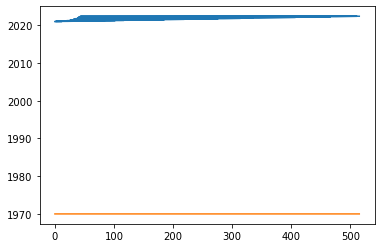

In [794]:
plt.plot(lastDF)

In [791]:
lastDF["fail"]

0      0
1      0
2      0
3      0
4      0
      ..
43     1
512    0
513    0
514    0
515    0
Name: fail, Length: 560, dtype: int64

In [801]:
from mlforecast.utils import generate_daily_series

In [887]:
mldf = lastDF

In [888]:
mldf.columns = ["ds","y"]

In [889]:
mldf

,ds,y
0,2021-01-01,0
1,2021-01-02,0
2,2021-01-03,0
3,2021-01-04,0
4,2021-01-05,0
...,...,...
43,2022-05-27,1
512,2022-05-28,0
513,2022-05-29,0
514,2022-05-30,0


In [805]:
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean

from mlforecast.utils import generate_daily_series, generate_prices_for_series

In [840]:
series = mldf
series["unique_id"] = "id_00"
series.set_index("unique_id",inplace=True)

In [841]:
from mlforecast.core import TimeSeries
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean

ts = TimeSeries(
    lags=[7, 14],
    lag_transforms={
        1: [expanding_mean],
        7: [(rolling_mean, 7), (rolling_mean, 14)]
    },
    date_features=['dayofweek', 'month']
)
ts

TimeSeries(freq=<Day>, transforms=['lag-7', 'lag-14', 'expanding_mean_lag-1', 'rolling_mean_lag-7_window_size-7', 'rolling_mean_lag-7_window_size-14'], date_features=['dayofweek', 'month'], num_threads=1)

In [842]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)

In [843]:
from mlforecast.forecast import Forecast

fcst = Forecast(model, ts)

In [844]:
fcst.fit(series)

Forecast(model=RandomForestRegressor(random_state=0), ts=TimeSeries(freq=<Day>, transforms=['lag-7', 'lag-14', 'expanding_mean_lag-1', 'rolling_mean_lag-7_window_size-7', 'rolling_mean_lag-7_window_size-14'], date_features=['dayofweek', 'month'], num_threads=1))

In [850]:
predictions = fcst.predict(20)

In [851]:
predictions

,ds,y_pred
unique_id,,
id_00,2022-06-01,0.00
id_00,2022-06-02,0.00
id_00,2022-06-03,0.03
id_00,2022-06-04,0.03
id_00,2022-06-05,0.03
id_00,2022-06-06,0.04
id_00,2022-06-07,0.04
id_00,2022-06-08,0.04
id_00,2022-06-09,0.06


In [923]:
mldf2 = mldf[:-10]

In [954]:
series = mldf2
series["unique_id"] = "id_00"
series.set_index("unique_id",inplace=True)

ts = TimeSeries(
    lags=[30,60],
    lag_transforms={
        1: [expanding_mean],
        7: [(rolling_mean, 30), (rolling_mean, 60)]
    },
    date_features=['dayofweek', 'month']
)
ts

C:\Users\Deniz\AppData\Local\Temp/ipykernel_7288/2168982202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series["unique_id"] = "id_00"


TimeSeries(freq=<Day>, transforms=['lag-30', 'lag-60', 'expanding_mean_lag-1', 'rolling_mean_lag-7_window_size-30', 'rolling_mean_lag-7_window_size-60'], date_features=['dayofweek', 'month'], num_threads=1)

In [955]:
model = RandomForestRegressor(random_state=0)

In [956]:
fcst = Forecast(model, ts)

In [957]:
fcst.fit(series)

Forecast(model=RandomForestRegressor(random_state=0), ts=TimeSeries(freq=<Day>, transforms=['lag-30', 'lag-60', 'expanding_mean_lag-1', 'rolling_mean_lag-7_window_size-30', 'rolling_mean_lag-7_window_size-60'], date_features=['dayofweek', 'month'], num_threads=1))

In [960]:
predictions = fcst.predict(30)

In [961]:
predictions

,ds,y_pred
unique_id,,
id_00,2022-05-23,0.15
id_00,2022-05-24,0.18
id_00,2022-05-25,0.06
id_00,2022-05-26,0.02
id_00,2022-05-27,0.10
id_00,2022-05-28,0.09
id_00,2022-05-29,0.11
id_00,2022-05-30,0.25
id_00,2022-05-31,0.28


In [962]:
mldf3 = mldf[:-20]

In [975]:
series = mldf3
series["unique_id"] = "id_00"
series.set_index("unique_id",inplace=True)

ts = TimeSeries(
    lags=[30,40],
    lag_transforms={
        1: [expanding_mean],
        7: [(rolling_mean, 30), (rolling_mean, 40)]
    },
    date_features=['dayofweek', 'month']
)

C:\Users\Deniz\AppData\Local\Temp/ipykernel_7288/1059454479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series["unique_id"] = "id_00"


In [976]:
model = RandomForestRegressor(random_state=0)

In [977]:
fcst = Forecast(model, ts)

In [978]:
fcst.fit(series)

Forecast(model=RandomForestRegressor(random_state=0), ts=TimeSeries(freq=<Day>, transforms=['lag-30', 'lag-40', 'expanding_mean_lag-1', 'rolling_mean_lag-7_window_size-30', 'rolling_mean_lag-7_window_size-40'], date_features=['dayofweek', 'month'], num_threads=1))

In [986]:
predictions = fcst.predict(60)

In [987]:
predictions

,ds,y_pred
unique_id,,
id_00,2022-05-13,0.00
id_00,2022-05-14,0.00
id_00,2022-05-15,0.00
id_00,2022-05-16,0.00
id_00,2022-05-17,0.06
id_00,2022-05-18,0.00
id_00,2022-05-19,0.24
id_00,2022-05-20,0.24
id_00,2022-05-21,0.23


In [989]:
predictions.to_excel("predictions.xlsx")